# Período 7

In [14]:
import numpy as np
from datetime import datetime
import requests
import pandas as pd

In [15]:
r = requests.get('http://vps-40d69db1.vps.ovh.ca:21046/api/ExecucaoSimulacaos/melhorValidacaoPeriodoFlat?idPeriodo=7')
j = r.json()
df = pd.DataFrame.from_dict(j)

### Quantidade de simulações dentro do conceito de melhores pelo indicador do período

In [16]:
print("Simulações com pontos mínimos: " , len(df))

Simulações com pontos mínimos:  40467


In [17]:
df.groupby(['experimentoSimulacaoId','saldoValidacao']).size()

experimentoSimulacaoId  saldoValidacao
54                       0.0               4970
                         1.0                851
56                       0.0               6109
                         1.0                133
57                      -1.0                 43
                         0.0               9785
                         1.0                 70
58                       0.0              18159
                         1.0                315
dtype: int64

In [20]:
dfTotais =  df.groupby(['saldoValidacao']).size().to_frame('qtde')

In [21]:
dfTotais['percentual'] = dfTotais.qtde / dfTotais.qtde.sum()

In [22]:
dfTotais

,qtde,percentual
saldoValidacao,,
-1.0,43,0.001063
0.0,39023,0.965080
1.0,1369,0.033857


<AxesSubplot:ylabel='percentual'>

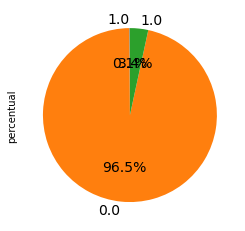

In [24]:
dfTotais.plot(kind='pie', y = 'percentual', autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df['saldoValidacao'], legend = False, fontsize=14)